In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
#Economia antes de la enfermedad
w=1#salario diario
beta=0.999#Discount factor
days=30#periodos a simular
I=0.01#tasa de interes (bancario)


def Util(C):
    ut=0
    for m in range(len(C)):
        ut+=(beta**m)*np.log(C[m])
    return ut
        
def Fix(C):#fijar condiciones de contorno
    Monarr = np.zeros(days)#Arreglo Ahorros
    D=0
    for n in range(len(C)-1):
        D=w+(1+I)*D-C[n]
    Cfin=w+(1+I)*D
    return Cfin

def riq(C):
    Monarr = np.zeros(days)#Arreglo Ahorros
    D=0
    Cpar=0
    for n in range(len(C)):
        D=w+(1+I)*D-C[n]
        Monarr[n]=D
    return(Monarr)

In [4]:
C = w*np.ones(days)#=(w,w,w,w,w,w,w,w,w,w,.....)
u=0
for l in range(100000):
    d=np.random.randint(len(C))
    tempC=np.array(C)
    vc=tempC[d]
    ncd=vc+np.random.normal(0,0.01)
    while ncd<0:
        ncd=vc+np.random.normal(0,0.01)
    tempC[d]=ncd
    tempC[-1]=Fix(tempC)
    #print(Util(tempC),Util(C))
    if Util(tempC)>Util(C):
        C=tempC


In [5]:
C

array([0.881517  , 0.88944002, 0.89743221, 0.90552581, 0.91367139,
       0.92186611, 0.93013993, 0.93853494, 0.94699171, 0.95546374,
       0.96405711, 0.97274438, 0.98145921, 0.99030572, 0.99918949,
       1.00817675, 1.01723079, 1.02636738, 1.03560706, 1.04491399,
       1.05434624, 1.06378024, 1.07334792, 1.08299863, 1.0927307 ,
       1.10256761, 1.11245032, 1.12250563, 1.13255535, 1.1427536 ])

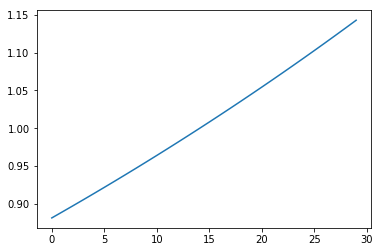

In [10]:
#plt.plot(C)
theorC=np.zeros_like(C)
theorC[0]=C[0]
for l in range(1,len(C)):
    theorC[l]=beta*(1+I)*theorC[l-1]
plt.plot(theorC)

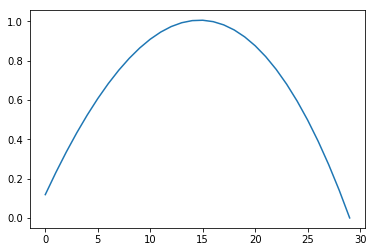

In [11]:
plt.plot(riq(C))

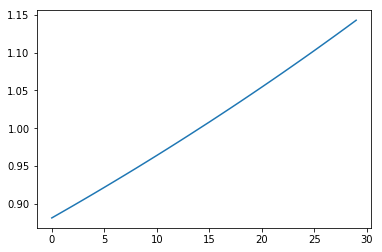

In [8]:
plt.plot(C)

In [9]:
C

array([0.88153197, 0.88946061, 0.89743391, 0.9055312 , 0.91364795,
       0.92186962, 0.93015579, 0.93850916, 0.94695672, 0.95548588,
       0.96407098, 0.97272507, 0.98146458, 0.99029911, 0.99919278,
       1.00818228, 1.01724707, 1.02638441, 1.03561389, 1.04491017,
       1.05430982, 1.06378339, 1.0733537 , 1.08298318, 1.09273778,
       1.10256343, 1.11247579, 1.12246831, 1.13256919, 1.14274889])